# week 8 
## statistical inference II: model comparison, bayesian inference, and more time series

dr. tomomi parins-fukuchi


### what is inference?


- **statistical inference:** making a proposition about some properties of a population

- this can help us make generalizations to learn how the world works

- this process involves both **data** and a **model**


## likelihoods

- we have learned about the likelihood function
  - let's think of this as the "heart" of inference
- used it for parameter estimation
- let's learn now about some other ways it can be used

## frequentism and likelihoods

- frequentist statistics can make use of the likelihood
- let's look at a simple example

### what is the probability that a coin is fair*?

*has an equal chance of being heads or tails when flipped


### Binomial PMF

$$ P(x|p,n) = \binom{n}{x} p^x q^{n-x}$$

p = probability of success in one trial

q = probability of failure in one trial

x = number of times that a specific outcome occurs in n trials

n = number of trials

### Binomial PMF and fair coins

$$ P(x) = \binom{n}{x} p^x q^{n-x}$$

p = probability of **heads** in one trial

q = probability of **tails** in one trial

x = number of times you observe a heads

n = number of flips

### Binomial PMF and fair coins

So if we assume a fair coin...

$$ P(x) = \binom{n}{x} 0.5^x 0.5^{n-x}$$

This expression is equivalent to asking:

$$ P(flips | fair) $$

Or, the probability of observing x heads in n flips, assuming the coin is fair

### Binomial p-value

- let's say we want to weigh the evidence for a fair coin, given our observation
- we can leverage the binomial distribution to construct a p-value, given a null hypothesis
- null hypothesis: the coin is fair


In [17]:
# what is the probability of observing x heads in 10 flips given that the coin is fair?

import matplotlib.pyplot as plt
import distributions as dist


binom = dist.binomial(n = 10, p = 0.5)
x = []
probs = []

p_val = 0.
for i in range(11):
    x.append(i)
    p = binom.pdf(i)
    probs.append(p)
    if i >= 7:
        p_val += p

## binomial p-value

- over many trials, what is the frequency we can expect to see 7 or more heads out of 10 flips?

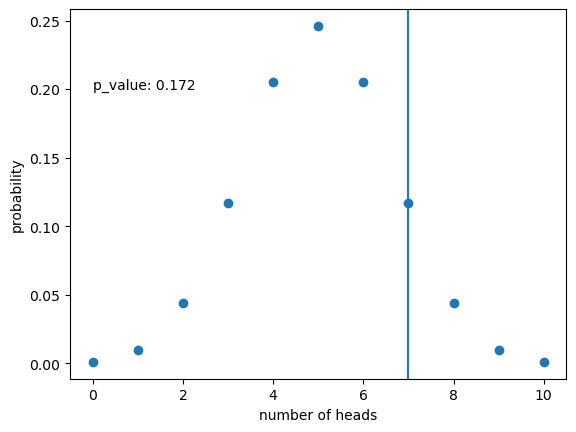

In [18]:
plt.plot(x,probs,"o")
plt.axvline(x = 7)
plt.text(0,0.20,f"p_value: {str(round(p_val,3))}")
plt.xlabel("number of heads")
plt.ylabel("probability")

plt.show()

## binomial p-value

- over many trials, what is the frequency we can expect to see 7 or more heads out of 10 flips?
- what happens if we increase # flips?

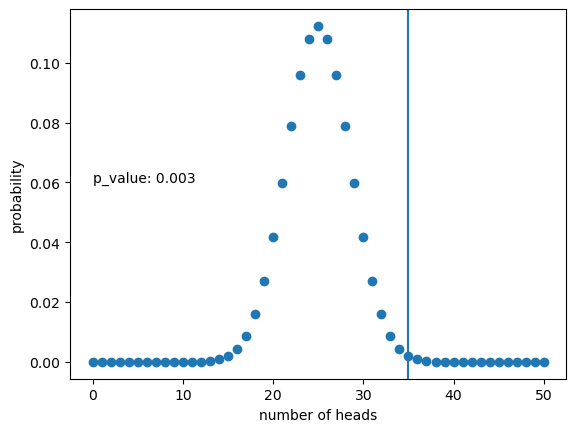

In [19]:
# what is the probability of observing x heads in 10 flips given that the coin is fair?

import matplotlib.pyplot as plt
import distributions as dist


binom = dist.binomial(n = 50, p = 0.5)
x = []
probs = []


p_val = 0.0
for i in range(51):
    x.append(i)
    p = binom.pdf(i)
    probs.append(p)
    if i >= 7*5:
        p_val += p
    
plt.plot(x,probs,"o")
plt.axvline(x = 7*5)
plt.text(0,0.06,f"p_value: {str(round(p_val,3))}")
plt.xlabel("number of heads")
plt.ylabel("probability")

plt.show()

## binomial p-value

- over many trials, what is the frequency we can expect to see 7 or more heads out of 10 flips?
- what happens if we increase # flips?
  - fair coin null hypothesis much weaker explanation for throwing 70% heads

## frequentism and p-values

- this approach can be useful but has limitations
- what if we dont like the null? 
- what if we wont to weigh more than one hypotheses (the null)?

## model comparison

- several approaches to weigh competing evidence across models exist
- comparing likelihoods form basis of these

## model comparison

- a model with more free parameters will almost always have a higher likelihood than less complex one



In [20]:
import math

binom = dist.binomial(n = 10, p = 0.5)
fair_loglike = math.log(binom.pdf(7))

p_mle = 7 / 10.
binom = dist.binomial(n = 10, p = p_mle )
unfair_loglike = math.log(binom.pdf(7))

print("fair coin log-like:",fair_loglike,"\nunfair coin log-like:",unfair_loglike)

fair coin log-like: -2.1439800628174073 
unfair coin log-like: -1.3211512777668886


## overfitting vs underfitting

- why not just always add more parameters?
- we are trying to find _general trends_ by interrogating a dataset with a model
- if we add too many parameters, the resulting model ends up fitting noise idiosyncratic to the data
- we want to find the model that best explains the data without fitting noise


## likelihood ratio test

- is likelihood of more complex model _significantly_ better?
- compute test statistic $LR = -2 \log(\frac{L_{m0}}{L_{m1}})$
- see if $LR$ exceeds significance threshold under chi-squared distribution
    - deg. freedom = difference in # paramaters between m0 and m1 

## likelihood ratio test

- requires that models m0 and m1 are "nested" 
    - i.e., one is special case of the other
- what if we want to compare more than two, or other types of models?

## akaike information criterion (AIC)

- criterion to compare models of different dimensionality using information theory

![bg right h:700](images/akaike.png)

## akaike information criterion (AIC)

- capturing underlying distribution of some data with a model comes with loss of information
- the best model is the one that yields the lowest information loss

## akaike information criterion (AIC)

$$ 2k - 2\log(\hat{L})$$

- $k$: # parameters in the model
- $\hat{L}$: log-likelihood with all parameters at their MLEs
- among set of candidate models, one with lowest AIC best explains data
- penalizes the addition of paramters through $2k$ term


In [21]:
import math


def calc_aic(k, ll):
    return (2. * k) - (2. * ll)


print("fair coin AIC:",calc_aic(0,round(fair_loglike,2)), "\nunfair coin AIC:",round(calc_aic(1,unfair_loglike),2))

fair coin AIC: 4.28 
unfair coin AIC: 4.64


## akaike information criterion (AIC)

- what happens when we increase the _n_?


In [22]:
binom = dist.binomial(n = 50, p = 0.5)
fair_loglike = math.log(binom.pdf(35))
binom = dist.binomial(n = 50, p = 7 / 10)
unfair_loglike = math.log(binom.pdf(35))

print("fair coin AIC:  ",calc_aic(0,round(fair_loglike,2)), "\nunfair coin AIC:",round(calc_aic(1,unfair_loglike),2))

fair coin AIC:   12.44 
unfair coin AIC: 6.2


## model comparison

- **every hypothesis test can be recast as a comparison between models**

## model comparison

- AIC penalizes the addition of new parameters
- but is still known to overfit in many circumstances
- generally, we want to optimize tradeoff between # parameters and sample size
  - larger sample size can inform inference of more complex models

## model comparison

- several alternatives that take dataset size into account
- AICc, BIC

$$ BIC  = k\log{n} - 2\log(\hat{L}) $$

In [23]:
def calc_bic(k, n, ll):
    return (math.log(n) * k) - (2. * ll)

binom = dist.binomial(n = 10, p = 0.5)
fair_loglike = math.log(binom.pdf(7))
binom = dist.binomial(n = 10, p = 7 / 10)
unfair_loglike = math.log(binom.pdf(7))

print("fair coin BIC:",calc_bic(0,10,fair_loglike), "\nunfair coin BIC:",calc_bic(1,10,unfair_loglike))

fair coin BIC: 4.2879601256348145 
unfair coin BIC: 4.944887648527823


In [24]:
binom = dist.binomial(n = 50, p = 0.5)
fair_loglike = math.log(binom.pdf(35))
binom = dist.binomial(n = 50, p = 7 / 10)
unfair_loglike = math.log(binom.pdf(35))

print("fair coin BIC:",calc_bic(0,50,fair_loglike), "\nunfair coin BIC:",calc_bic(1,50,unfair_loglike))

fair coin BIC: 12.430078127504435 
unfair coin BIC: 8.113813282427396


## model averaging and uncertainty

- we may wish to know how much better one model explains a dataset than a nother
- AIC weights give a natural way to compare relative support for $n$ models 

$$W_{AIC} = \frac{R}{\sum_{i=1}^n R_i} $$ 

where $R$ is the _relative likelihood_:

$$ R = exp( -0.5 * \Delta AIC ) $$

and $\Delta AIC$ is the difference between the lowest AIC value and the current model

In [25]:
import math

aics = [calc_bic(0,50,fair_loglike),calc_bic(1,50,unfair_loglike)]

R = [math.exp(-0.5 * (i - min(aics))) for i in aics]

w = [i / sum(R) for i in R]

print("fair BIC weight:  ", round(w[0],2),"\nunfair BIC weight:", round(w[1],2))

fair BIC weight:   0.1 
unfair BIC weight: 0.9


## model selection for trilobites data

- let's see how BIC performs on time series data
- simulate under a trend model
- fit simple BM and trend models 
- compare BIC and weights
- does BIC favor the generating model??

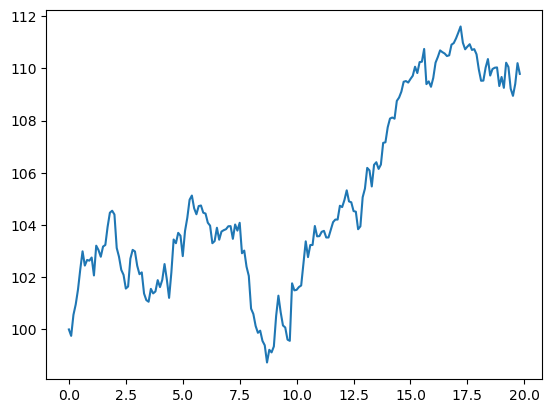

In [26]:
# generate data for Brownian model with positive trend

time_step = 0.1
total_myr = 20.0
n_iter = int(total_myr / time_step)

curtime = 0.0
times = []
y_t = 100.0
pheno = []

trend = 2.8
sigma = 1.5
norm = dist.normal(mean=0.0, sd = sigma)
for i in range(n_iter-1):
    pheno.append(y_t)
    times.append(curtime)

    delta_y = (norm.sample(1)[0] + (trend * time_step)) * math.sqrt(time_step)
    y_t += delta_y
    curtime = curtime + time_step
        
plt.plot(times,pheno)
plt.show()


In [27]:
from scipy import optimize


def brownian_ts_negll(sigma, times, data):
    ll = 0.0
    for i in range(1,len(times)):
        cur_val = data[i]
        last_val = data[i-1]
        delta_y = last_val - cur_val
        delta_t = times[i] - times[i-1]
        sd = math.sqrt(sigma * delta_t)
        stepll = math.log((1.0/(sd*math.sqrt(2.*math.pi)))) + ((-.5 * (((delta_y - 0.0)/sd)**2.)))
        ll += stepll
    return -ll

def evaluate_brownian(params,times,data):
    sigma = params[0]
    if sigma <= 0.0:
        return 100000000.
    
    nll = brownian_ts_negll(sigma,times,data)
    return nll
        

res = optimize.minimize(evaluate_brownian, [1.], args=(times, pheno), method = "Powell")
rate_mle = res.x[0]
bm_ll = -res.fun
print("sigma MLE:",rate_mle)

sigma MLE: 2.515991573687645


In [28]:
def trend_ts_negll(trend, sigma, times, data):
    ll = 0.0
    norm = dist.normal(trend,1.0)

    for i in range(1,len(times)):
        cur_val = data[i]
        last_val = data[i-1]
        delta_y = cur_val - last_val
        delta_t = times[i] - times[i-1]
        mean = trend * delta_t
        sd = math.sqrt(sigma * delta_t)
        stepll = math.log((1.0/(sd*math.sqrt(2.*math.pi)))) + ((-.5 * (((delta_y - mean) / sd ) ** 2.)))
        ll += stepll
    return -ll

def evaluate_trend(params,times,data):
    trend = params[0]
    sigma = params[1]
    if sigma <= 0.0:
        return 100000000.
    
    nll = trend_ts_negll(trend,sigma,times,data)
    return nll


    
res = optimize.minimize(evaluate_trend, [0.0, 1.0], args=(times, pheno), method = "BFGS")
trend_mle = res.x[0]
rate_mle = res.x[1]
trend_ll = -res.fun
print("trend MLE:",trend_mle,"\nsigma MLE:",rate_mle)

trend MLE: 0.4942751469929849 
sigma MLE: 2.491561513298629


## compare the likelihoods

In [29]:
print("brownian log-likelihood:",bm_ll,"\ntrend log-likelihood:   ",trend_ll)

brownian log-likelihood: -144.3379366122547 
trend log-likelihood:    -143.37193760747917


## compare the BICs

In [30]:
bm_bic = calc_bic(1,len(pheno),bm_ll)
trend_bic = calc_bic(2,len(pheno),trend_ll)
print("brownian BIC:",bm_bic,"\ntrend BIC:   ",trend_bic)

brownian BIC: 293.9691780492339 
trend BIC:    297.3304848644073


In [31]:
aics = [bm_bic,trend_bic]

R = [math.exp(-0.5 * (i - min(aics))) for i in aics]

w = [i / sum(R) for i in R]

print("brownian BIC weight:", round(w[0],2),"\ntrend BIC weight:   ", round(w[1],2))

brownian BIC weight: 0.84 
trend BIC weight:    0.16


## bayesian inference

- builds on the model comparison framework
- combines evidence from the likelihood with prior information to estimate uncertainty

## thomas bayes

- 19th century anglican theologian

![bg right h:700](images/tbayes.png)

## bayesian inference

- the likelihood is the probability of the data given a model, $P(D|M)$
- this is a very general expression

## bayesian inference

- imagine you are in your apartment and hear a huge crash above you
- what is the probability of hearing this crash if: 
    - $M_{0}$: minions are bowling in the apartment upstairs?
    - $M_{1}$: the neighbor who just moved in dropped a large box of stuff that scattered?
       



## bayesian inference

- $L(M_{0}) \approx 1$ <- you would almost definitely hear noises if minions were bowling upstairs
- $L(M_{1}) \approx 1$ <- this scenario would also almost certainly yield a banging sound

## bayesian inference

- bayes suggested that we might combine _a priori_ information with new observations to draw conclusions
- expressed $P(M|D)$ in terms of $P(D|M)$ and $P(M)$ by linking conditional probabilities

## bayes' theorem

$$ P(A\cap B) = P(B) P(A | B) = P(A) P(B | A)  $$


## bayes' theorem

$$ P(B) P(A | B) = P(A) P(B | A) $$



## bayes' theorem

$$ P(A | B) = \frac{P(A) P(B | A)}{P(B)} $$


## bayes' theorem

$$ P(M | D) = \frac{P(M) P(D | M)}{P(D)} $$

- $P(M | D)$ is called the **posterior** probability
- $P(M)$ is the **prior** probability
    - what was the probability of the model before we collected any observations?
- $P(D | M)$ is the likelihood
- $P(D)$ is the probability of the data across the entire universe of possible models


## bayesian inference

- setting aside the denominator for the moment:
    - we can compare: $P(M_0)P(D|M_{0})$ vs $P(M_1)P(D|M_{1})$
    - likelihood of $M_0$ and $M_1$ is the same, 1
    - but the prior probability of $M_0$ is quite low
      - posterior probability of $M_0$ is lower than that for $M_1$

## bayesian inference

- compelling arguments have been made that we naturally think as bayesians

## break time

## bayesian inference

- can use this approach to compare models and infer parameters
- let's bring back our simulated anoles for an example:
    - model SVL measurements for a population of lizards using a normal distribution
    - **what is the posterior distribution of values the mean and sd can take?**

## bayesian inference

- bayesian inference can target several types of estimates
    - **maximum _a posteriori_**: what parameter value has the highest posterior prob?
        - which values of &mu; and &sigma; maximize $P(M|D)$?
        - this is a point estimate, similar to MLE
    - **posterior distribution**: also common to estimate the entire posterior probability _distribution_
        - $P(M|D)$, $P(M)$, $P(D|M)$ reflect distributions over a range of param. values
        - for anole svl, we want the _distribution_ of $P(M|D)$ over different values of &mu; and &sigma;
        - usually involves calculating or approximating a very complicated integral
        

## bayesian inference on lizards

- remember likelihood is normal PDF
- how can we choose a prior?

## priors

- many approaches exist:
    - flat: assume no knowledge _a priori_
        - e.g.,  for &sigma;, could say uniform density btwn 100 and 200
    - weakly informative
        - e.g., normal with mean of 150 and sd of 30
    - strongly informative
        - e.g., normal with mean of 150 and sd of 2




## bayesian inference

- we need one more component, $P(D)$
- this is non trivial


$$ P(M | D) = \frac{P(M) P(D | M)}{P(D)} $$


## markov chain monte carlo (MCMC)

- one common approach is to let random walks work for us
- general idea is to construct a random walk (i.e., a "markov chain") that converges on the posterior distribution
- simulates draws from the posterior distribution to approximate the integral


## markov chain monte carlo (MCMC)


![bg right h:700](images/bayes.svg)

## metropolis-hastings algorithm

- discovered in 1953 by a group of former manhattan project scientists
- can draw samples from a target distribution if given a function _proportional to_ the density of the target

$$ P(M | D) = \frac{P(M) P(D | M)}{P(D)} \propto P(M) P(D | M) $$

- since numerator is proportional to the posterior, we can use it for MH simulations

## metropolis-hastings algorithm (the recipe)

1. initialize parameter vector, $x$ (could simply be random) and start the chain (for loop)
2. update parameters to create new vector $x'$
    - these proposals are drawn from proposal distributions of the user's choice
3. compute the ratio $R = \frac{P(x')P(D|x')}{P(x)P(D|x)}$
4. accept $x'$ with probability $R$ 
    - always accept if new params better than old (i.e., $P(x')P(D|x') > P(x)P(D|x)$)
    - we accept _worse_ param values with some probability
5. return to 2 and repeat many times


## metropolis-hastings algorithm

- as we collect many samples, empirical distribution visited by chain converges to posterior
  - this is guaranteed if infinite time is spent in the chain
  
- lets give it a go to try estimating the posterior for our population mean

- we will assume that any mean value has an equal (uniform) prior probability


In [17]:
def norm_ll(mean, sd, x):
    dens = math.log((1.0/(sd*math.sqrt(2.*math.pi))))+((-.5 * (((x - mean)/sd)**2.)))
    return dens

def svl_norm_ll(mean,sd, data):
    return sum([norm_ll(mean,sd, i) for i in data])

In [18]:
import random, math

svl = dist.normal(130.0,10.0).sample(50)
mean = 115.
sd = 10.
mean_prop = dist.normal(0., 4.)
ll = svl_norm_ll(mean,sd,svl)


gen = 100
gens = []
samples = []
mean_samp = []
accept = 0
for i in range(gen):
    mean_star = mean + mean_prop.sample(1)[0]
        
    ll_star = svl_norm_ll(mean_star,sd,svl)
    
    ratio = math.exp(ll_star - ll)
    if ratio >= 1. or random.random() < ratio:
        accept+=1
        ll = ll_star
        mean = mean_star
        
    gens.append(i)
    samples.append(ll)
    mean_samp.append(mean)
        

print("proportion of proposals accepted:",accept/gen)

proportion of proposals accepted: 0.38


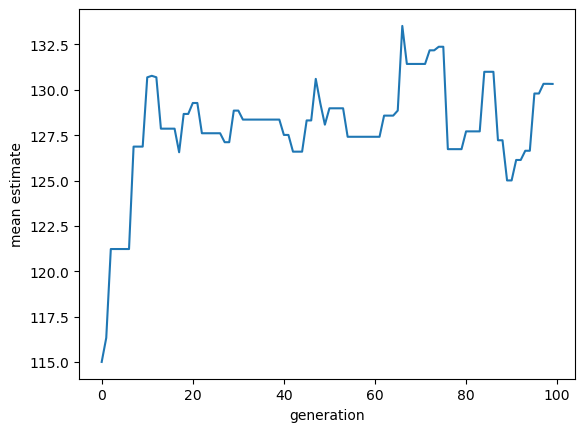

In [19]:
plt.plot(gens,mean_samp)
plt.xlabel("generation")
plt.ylabel("mean estimate")
plt.show()

## metropolis-hastings algorithm in practice

- we want the 'stationary distribution' of the markov chain
    - discard the first 10% or 20% as 'burn-in'
- parameter values are temporally autocorrelated throughout the markov chain
    - this leads to smaller # of 'effective' samples
    - need to generate many simulations to achieve good estimate of posterior
    - to save storage space, we can "thin" the chain and only sample every N generations



In [20]:
import random, math

svl = dist.normal(130.0,10.0).sample(50)
mean = 120.
sd = 10.
mean_prop = dist.normal(0., 4.) # distribution from which we draw random perturbations of the current value of mu
ll = svl_norm_ll(mean,sd,svl)


gen = 100000
thin = 100
gens = []
samples = []
mean_samp = []
accept = 0
for i in range(gen):
    mean_star = mean + mean_prop.sample(1)[0]
        
    ll_star = svl_norm_ll(mean_star,sd,svl)
    
    ratio = math.exp(ll_star - ll)
    if ratio >= 1. or random.random() < ratio:
        accept+=1
        ll = ll_star
        mean = mean_star
        
    if i % thin == 0:
        gens.append(i)
        samples.append(ll)
        mean_samp.append(mean)
        

print(accept/gen)

0.3904


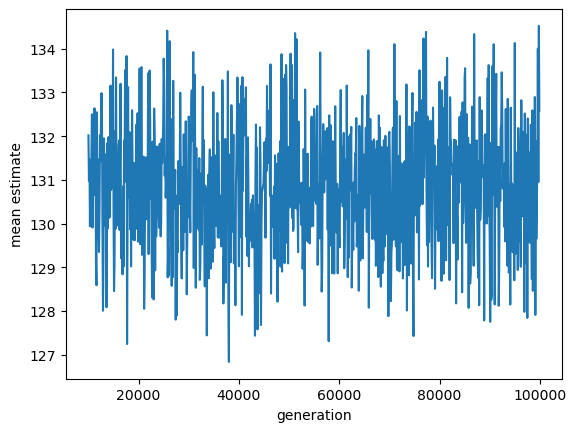

In [21]:
postburn = gen // 10 // 100
postburn_mu = mean_samp[postburn:]
plt.plot(gens[postburn:],postburn_mu)
plt.xlabel("generation")
plt.ylabel("mean estimate")
plt.show()

## bayesian inference

- this chain gives an estimate of the posterior distribution of &mu;

- the mean may be a good point estimate



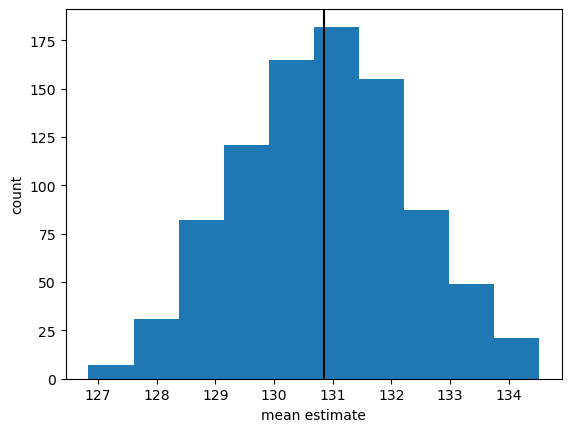

In [22]:
plt.hist(postburn_mu)
plt.ylabel("count")
plt.xlabel("mean estimate")
plt.axvline(dist.mean(postburn_mu),color="black")
plt.show()

## bayesian inference

- posterior also quanitfies uncertainty in parameter estimate
- what is the range of values of &mu; spanning 95% of the density of posterior distribution?
    - we call this the _credibility interval_



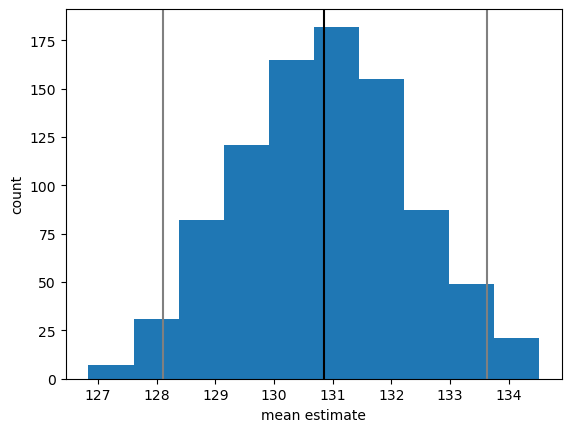

In [23]:
import numpy as np

plt.hist(postburn_mu)
plt.ylabel("count")
plt.xlabel("mean estimate")
lower = np.quantile(postburn_mu,0.025)
upper = np.quantile(postburn_mu,0.975)
plt.axvline(dist.mean(postburn_mu),color="black")
plt.axvline(lower,color="grey")
plt.axvline(upper,color="grey")

plt.show()

## bayesian inference of brownian motion

- let's return to our brownian motion example to explore MCMC further

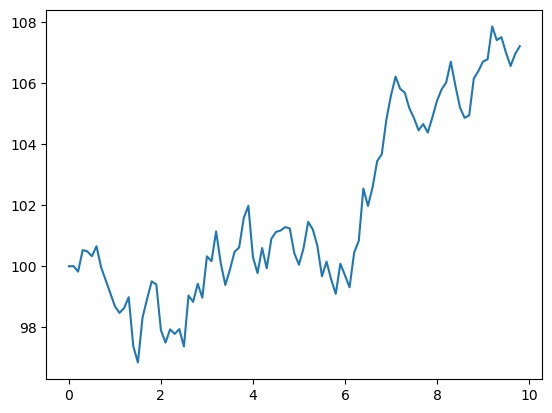

In [24]:
## simulate our time series data

sigma = 2.0

dt = 0.1
total_myr = 10.0
n_iter = int(total_myr / dt)


norm = dist.normal(mean=0.0, sd = 1.0)
curtime = 0.0
times = []
y_t = 100.0
pheno = []

for i in range(n_iter-1):
    pheno.append(y_t)
    times.append(curtime)
    delta_y = (norm.sample(1)[0] * sigma * math.sqrt(dt))
    y_t += delta_y
    curtime = curtime + 0.1
        
plt.plot(times,pheno)
plt.show()


In [25]:
## define our function to calculate the log-likelihood of the time series under BM

def brownian_ts_ll(sigma, times, data):
    ll = 0.0
    for i in range(1,len(times)):
        cur_val = data[i]
        last_val = data[i-1]
        delta_y = last_val - cur_val
        delta_t = times[i] - times[i-1]
        sd = sigma * math.sqrt(delta_t)
        stepll = math.log((1.0/(sd*math.sqrt(2.*math.pi)))) + ((-.5 * (((delta_y - 0.0)/sd)**2.)))
        ll += stepll
    return ll

In [33]:
## define function to propose new values for sigma

def generate_sigma_proposal(sigma, prop_dist):
    while True:
        sigma_star = sigma + prop_dist.sample(1)[0]
        if sigma_star > 0.:
            break
    return sigma_star

In [27]:
sigma = 1.3
sigma_prior = dist.normal(sigma, 0.25)
sigma_prop = dist.normal(0., 0.4)
ll = brownian_ts_ll(sigma,times,pheno) + sigma_prior.log_pdf(sigma)


gen = 100000
thin = 100
gens = []
samples = []
sigma_samp = []
accept = 0
for i in range(gen):

    sigma_star = generate_sigma_proposal(sigma,sigma_prop)
        
    ll_star = brownian_ts_ll(sigma_star,times,pheno) + sigma_prior.log_pdf(sigma_star)
    
    ratio = math.exp(ll_star - ll)
    if ratio >= 1. or random.random() < ratio:
        accept+=1
        ll = ll_star
        sigma = sigma_star
        
    if i % thin == 0:
        gens.append(i)
        samples.append(ll)
        sigma_samp.append(sigma)
        

print("acceptance rate:",accept/gen)

acceptance rate: 0.32082


## &sigma; across MCMC simulations

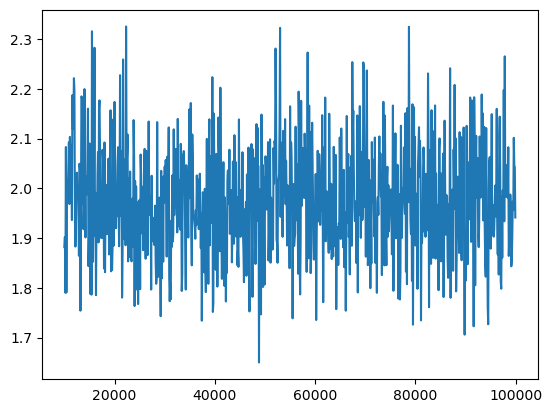

In [28]:
postburn = gen // 10 // 100
postburn_sigma = sigma_samp[postburn:]
plt.plot(gens[postburn:],postburn_sigma)
plt.show()

## estimated posterior distribution of &sigma;

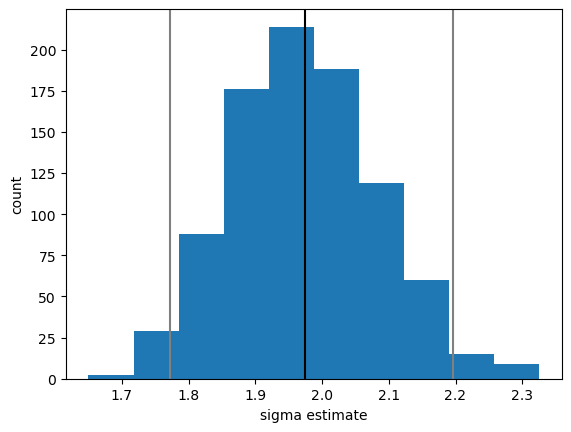

In [34]:
plt.hist(postburn_sigma)
plt.ylabel("count")
plt.xlabel("sigma estimate")
lower = np.quantile(postburn_sigma,0.025)
upper = np.quantile(postburn_sigma,0.975)
plt.axvline(np.mean(postburn_sigma),color="black")
plt.axvline(lower,color="grey")
plt.axvline(upper,color="grey")
plt.show()

## prior vs posterior

$$ P(M|D) \propto P(M)P(D|M) $$

- the prior density we defined contributes to the reconstructed posterior
- we may wish to know how strongly our prior drives our results

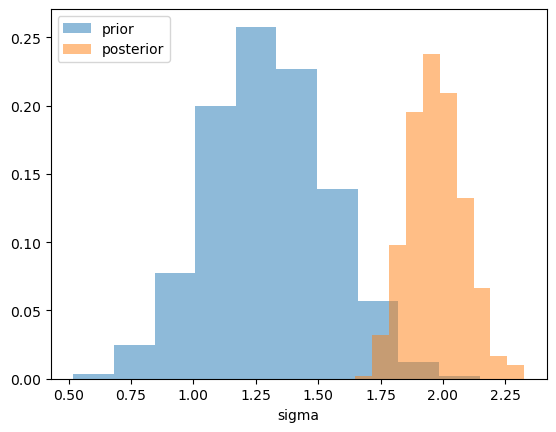

In [30]:
prior_samp = [sigma_prior.sample(1)[0] for _ in range(len(postburn_sigma))]

weights = np.ones_like(prior_samp) / len(prior_samp)
plt.hist(prior_samp,alpha=0.5,label="prior",weights=weights)
plt.hist(postburn_sigma,alpha=0.5,label="posterior",weights=weights)
plt.xlabel("sigma")
plt.legend(loc='upper left')
plt.show()

### MCMC for multidimensional models

- MCMC is very useful at reconstructing the posterior distribution across models with several parameters
- let's revisit our "stasis" OU model from last week to illustrate

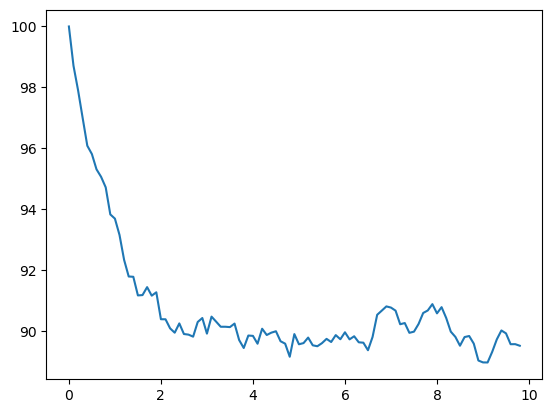

In [35]:
## simulate our data

theta = 90.0
sigma = 1.0

dt = 0.1
total_myr = 10.0
n_iter = int(total_myr / dt)


norm = dist.normal(mean=0.0, sd = 1.0)
curtime = 0.0
times = []
y_t = 100.0
pheno = []

for i in range(n_iter-1):
    pheno.append(y_t)
    times.append(curtime)
    delta_y = (  ( theta - y_t )  * dt) + (norm.sample(1)[0] * sigma * math.sqrt(dt))
    y_t += delta_y
    curtime = curtime + 0.1
        
plt.plot(times,pheno)
plt.show()


### our 2-parameter likelihood function

In [32]:
def stasis_ts_ll(theta, sigma, times, data):
    ll = 0.0
    for i in range(1,len(times)):
        cur_val = data[i]
        last_val = data[i-1]
        delta_y = last_val - cur_val
        delta_t = times[i] - times[i-1]
        mean = (  theta - last_val ) * delta_t 
        sd = sigma * math.sqrt(delta_t)
        stepll = math.log((1.0 / (sd*math.sqrt(2.*math.pi)))) + ((-.5 * (((delta_y - mean) / sd) ** 2.)))
        ll += stepll
    return ll

### MCMC on a 2-parameter model



In [41]:
def stasis_MCMC(gen,thin,start_p,theta_prior,sigma_prior,theta_prop,sigma_prop):
    theta = start_p[0]
    sigma = start_p[1]
    ll = stasis_ts_ll(theta,sigma,times,pheno) + theta_prior.log_pdf(theta) + sigma_prior.log_pdf(sigma)
    
    theta_samp = [theta]
    sigma_samp = [sigma]
    gens = [0]
    accept = 0

    for i in range(gen):

        if random.random() < .5:                   ## half the time we update theta, the other half sigma
            theta_star = theta + theta_prop.sample(1)[0]
            sigma_star = sigma
        else:
            theta_star = theta
            sigma_star = generate_sigma_proposal(sigma,sigma_prop)

        ll_star = stasis_ts_ll(theta_star,sigma_star,times,pheno) + theta_prior.log_pdf(theta_star) + sigma_prior.log_pdf(sigma_star)
        if ll_star - ll > 0.:
            ratio = 1.1
        else:
            ratio = math.exp(ll_star - ll)
        if random.random() < ratio:
            accept+=1
            ll = ll_star
            theta = theta_star
            sigma = sigma_star

        if i % thin == 0:
            gens.append(i)
            theta_samp.append(theta)
            sigma_samp.append(sigma)
    
    print("MCMC complete. Acceptance ratio:",accept / gen)
    return gens,theta_samp,sigma_samp
    
            

### MCMC on a 2-parameter model



In [45]:
import random, math


theta, sigma = 80., 1.3
theta_prior = dist.normal(80., 5.)
sigma_prior = dist.normal(2.3, 0.25)
theta_prop = dist.normal(0.0, 2.)
sigma_prop = dist.normal(0., 0.4)

gen = 100000
thin = 100

gens, theta_samp, sigma_samp = stasis_MCMC(gen,thin,[theta,sigma],theta_prior,sigma_prior,theta_prop,sigma_prop)

    


MCMC complete. Acceptance ratio: 0.34795


## markov chain for &theta; and &sigma;

- let's discard the first 10% of samples as burn-in

In [39]:
burnin = gen // 100 // 10 
theta_pb = theta_samp[burnin:] # remove first 10% of samples
sigma_pb = sigma_samp[burnin:]
gens_pb = gens[burnin:]

## markov chain for &theta; and &sigma;

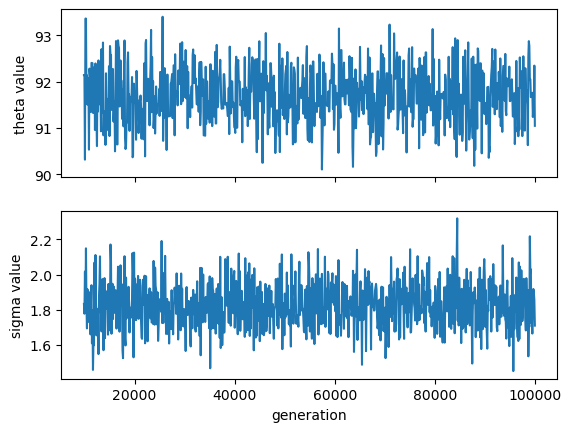

In [47]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(gens_pb, theta_pb)
ax1.xaxis.set_tick_params(labelbottom=False)
ax1.set(xlabel="", ylabel="theta value")
ax2.plot(gens_pb, sigma_pb)
ax2.set(xlabel="generation", ylabel="sigma value")

plt.show()

## estimated posterior distribution of theta and sigma

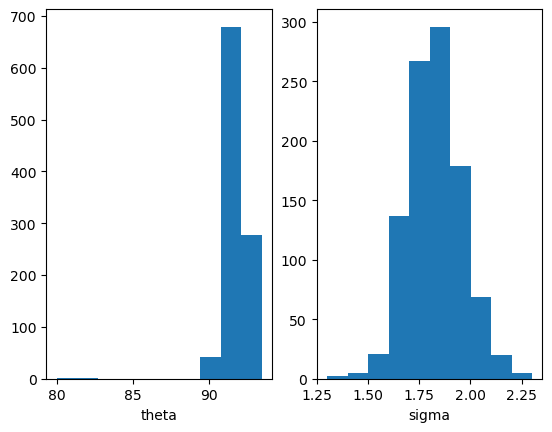

In [48]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(theta_samp)
ax1.set(xlabel="theta", ylabel="")
ax2.hist(sigma_samp)
ax2.set(xlabel="sigma", ylabel="")

plt.show()

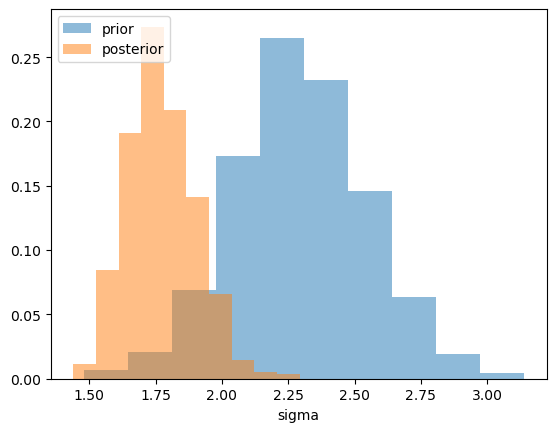

In [158]:
prior_samp = [sigma_prior.sample(1)[0] for _ in range(len(sigma_samp))]

weights = np.ones_like(prior_samp) / len(prior_samp)
plt.hist(prior_samp,alpha=0.5,label="prior",weights=weights)
plt.hist(sigma_samp,alpha=0.5,label="posterior",weights=weights)
plt.xlabel("sigma")
plt.legend(loc='upper left')
plt.show()

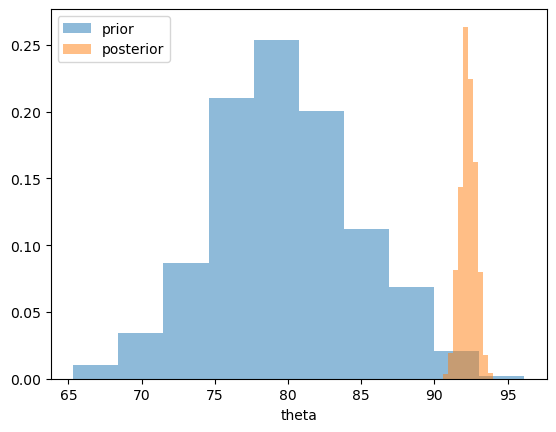

In [159]:
prior_samp = [theta_prior.sample(1)[0] for _ in range(len(theta_samp))]

weights = np.ones_like(prior_samp) / len(prior_samp)
plt.hist(prior_samp,alpha=0.5,label="prior",weights=weights)
plt.hist(theta_samp,alpha=0.5,label="posterior",weights=weights)
plt.xlabel("theta")
plt.legend(loc='upper left')
plt.show()

## joint posterior distribution


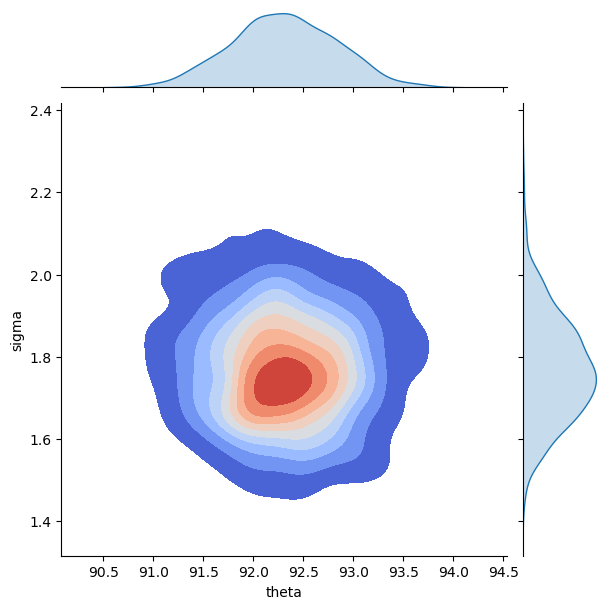

In [209]:
import seaborn as sns

sns.jointplot(x=theta_samp, y=sigma_samp, kind="kde",  cmap="coolwarm", fill=True, n_levels=10)
plt.xlabel("theta")
plt.ylabel("sigma")
plt.show()